In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
MPS_df = pd.read_excel(r"C:\Users\assis\Downloads\PAS_T&Cdashboard_to Q3 23-24.xlsx",  sheet_name='MPS')
Borough_df = pd.read_excel(r"C:\Users\assis\Downloads\PAS_T&Cdashboard_to Q3 23-24.xlsx", sheet_name='Borough')
Borough_df = Borough_df.loc[:, ~Borough_df.columns.str.contains('^Unnamed')]
MPS_df

,Date,Survey,Borough,Measure,Proportion
0,2014-12-31,PAS,MPS,"""Good Job"" local",0.67
1,2014-12-31,PAS,MPS,Contact ward officer,0.41
2,2014-12-31,PAS,MPS,Informed local,0.49
3,2014-12-31,PAS,MPS,Listen to concerns,0.74
4,2014-12-31,PAS,MPS,Relied on to be there,0.77
...,...,...,...,...,...
286,2023-12-31,PAS,MPS,Listen to concerns,0.57
287,2023-12-31,PAS,MPS,Relied on to be there,0.59
288,2023-12-31,PAS,MPS,Treat everyone fairly,0.62
289,2023-12-31,PAS,MPS,Trust MPS,0.69


In [7]:
all_measures = set(Borough_df['Measure'].to_list())
all_measures

{'"Good Job" local',
 'Contact ward officer',
 'Informed local',
 'Listen to concerns',
 'Relied on to be there',
 'Treat everyone fairly',
 'Trust MPS',
 'Understand issues'}

In [8]:
all_borough = set(Borough_df['Borough'].to_list())
all_borough

{'Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'City of Westminster',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond Upon Thames',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth'}

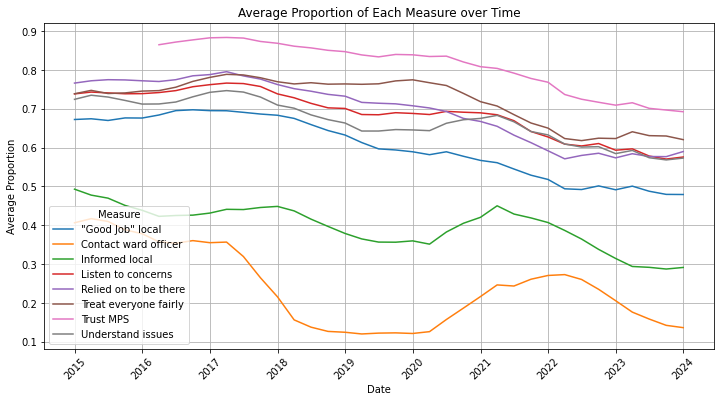

In [9]:
# Group by Date and Measure, then calculate the average proportion for each quarter and measure
average_proportion = Borough_df.groupby(['Date', 'Measure'])['Proportion'].mean().reset_index()

# Line plot for the average proportion of each measure over time
plt.figure(figsize=(12, 6))

# Iterate over each measure
for measure_name, data in average_proportion.groupby('Measure'):
    plt.plot(data['Date'], data['Proportion'], label=measure_name)

plt.title('Average Proportion of Each Measure over Time')
plt.xlabel('Date')
plt.ylabel('Average Proportion')
plt.xticks(rotation=45)
plt.legend(title='Measure')
plt.grid(True)
plt.show()

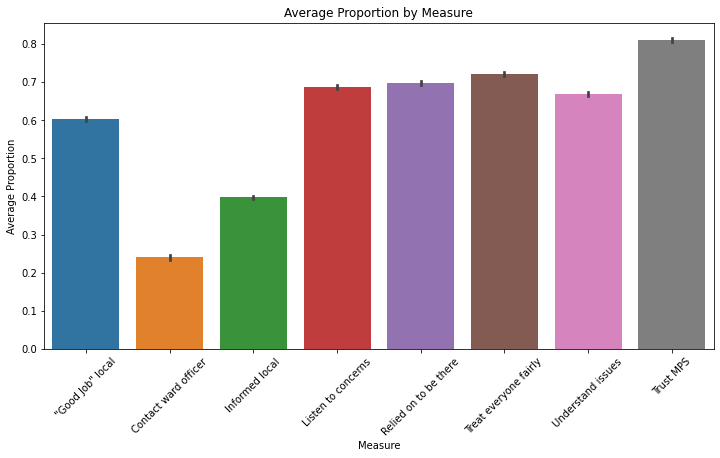

In [10]:
# Bar plot for average Proportion by Measure
plt.figure(figsize=(12, 6))
sns.barplot(x='Measure', y='Proportion', data=Borough_df)
plt.title('Average Proportion by Measure')
plt.xlabel('Measure')
plt.ylabel('Average Proportion')
plt.xticks(rotation=45)
plt.show()

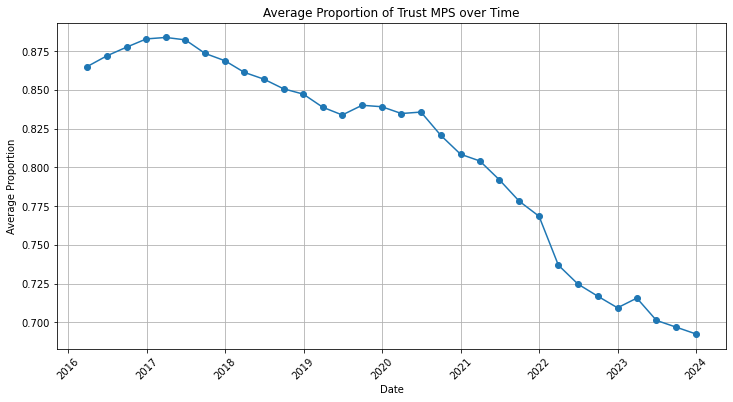

In [11]:
# Filter the DataFrame for a specific measure
measure_name = 'Trust MPS'
measure_df = Borough_df[Borough_df['Measure'] == measure_name]

# Line plot for the proportion of the chosen measure in different boroughs over time
average_proportion = measure_df.groupby('Date')['Proportion'].mean().reset_index()

# Line plot for the average proportion of the chosen measure over time
plt.figure(figsize=(12, 6))
plt.plot(average_proportion['Date'], average_proportion['Proportion'], marker='o', linestyle='-')
plt.title(f'Average Proportion of {measure_name} over Time')
plt.xlabel('Date')
plt.ylabel('Average Proportion')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
# Extract year from the 'Date' column
measure_df['Year'] = measure_df['Date'].dt.year

# Aggregate the data by year and borough, calculating the mean proportion
yearly_data = measure_df.groupby(['Year', 'Borough']).mean().reset_index()

C:\Users\assis\AppData\Local\Temp\ipykernel_17360\4183293003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure_df['Year'] = measure_df['Date'].dt.year


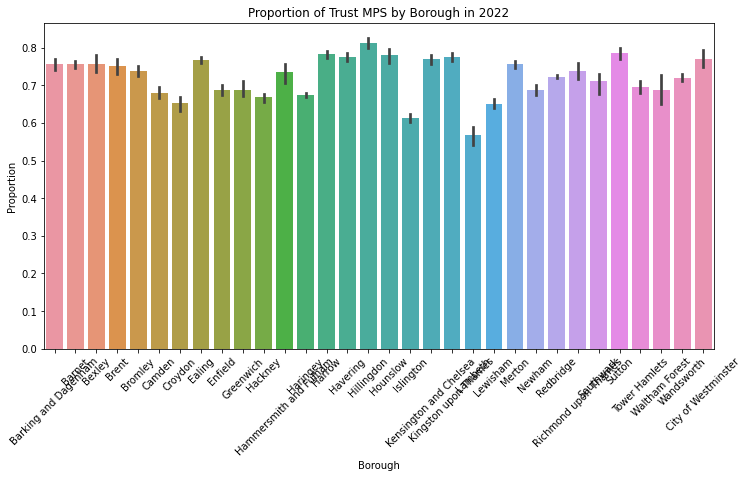

In [13]:
year_to_visualize = 2022 
measure_name = 'Trust MPS'

# Filter the data for the specified year and measure
filtered_df = Borough_df[(Borough_df['Date'].dt.year == year_to_visualize) & (Borough_df['Measure'] == measure_name)]

# Bar plot for the proportion of the chosen measure in different boroughs for the specified year
plt.figure(figsize=(12, 6))
sns.barplot(x='Borough', y='Proportion', data=filtered_df)
plt.title(f'Proportion of {measure_name} by Borough in {year_to_visualize}')
plt.xlabel('Borough')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

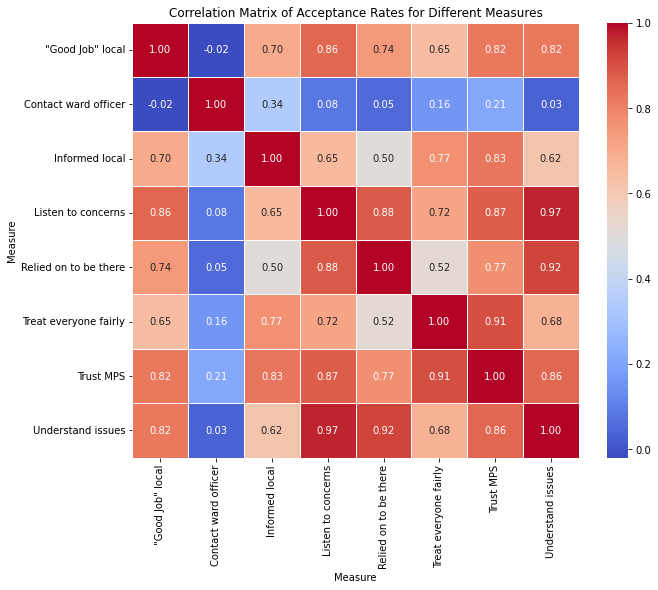

In [14]:
measures_data = Borough_df[['Borough','Measure', 'Proportion']]

# Pivot the DataFrame to have measures as columns and Borough as index
pivot_data = measures_data.pivot_table(index='Borough', columns='Measure', values='Proportion')

# Calculate the correlation matrix
correlation_matrix = pivot_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Acceptance Rates for Different Measures')
plt.xlabel('Measure')
plt.ylabel('Measure')
plt.show()

In [15]:
Borough_df.columns

Index(['Date', 'Survey', 'Borough', 'Measure', 'Proportion', 'MPS'], dtype='object')

In [16]:
Borough_df['Date']

0      2014-12-31
1      2014-12-31
2      2014-12-31
3      2014-12-31
4      2014-12-31
          ...    
9307   2023-12-31
9308   2023-12-31
9309   2023-12-31
9310   2023-12-31
9311   2023-12-31
Name: Date, Length: 9312, dtype: datetime64[ns]

In [17]:
Borough_df['Date'] = pd.to_datetime(Borough_df['Date'], format='%d/%m/%Y')
Borough_df['month'] = Borough_df['Date'].dt.strftime('%b')
Borough_df['month']

0       Dec
1       Dec
2       Dec
3       Dec
4       Dec
       ... 
9307    Dec
9308    Dec
9309    Dec
9310    Dec
9311    Dec
Name: month, Length: 9312, dtype: object

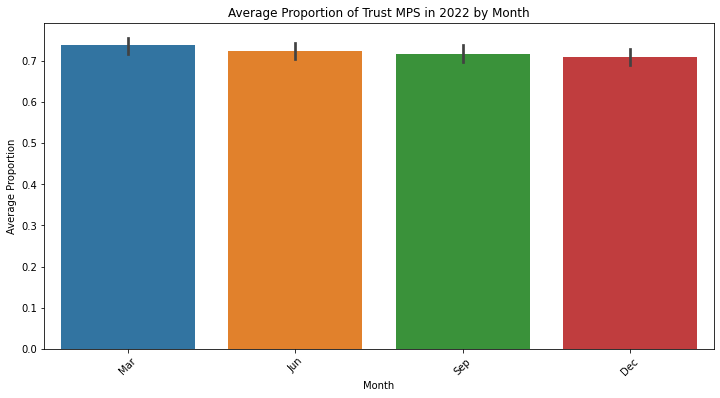

In [18]:
# Convert 'Date' column to datetime format
Borough_df['Date'] = pd.to_datetime(Borough_df['Date'], format='%d/%m/%Y')

# Extract month and store it in a new column 'Month'
Borough_df['Month'] = Borough_df['Date'].dt.strftime('%b')

# Specify the year and measure to visualize
year_to_visualize = 2022
measure_name = 'Trust MPS'

# Filter the data for the specified year and measure
filtered_df = Borough_df[(Borough_df['Date'].dt.year == year_to_visualize) & (Borough_df['Measure'] == measure_name)]

# Bar plot for average Proportion by Measure
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='Proportion', data=filtered_df)  # Use 'month' instead of 'Month'
plt.title(f'Average Proportion of {measure_name} in {year_to_visualize} by Month')
plt.xlabel('Month')
plt.ylabel('Average Proportion')
plt.xticks(rotation=45)
plt.show()

In [27]:
filtered_df

,Date,Survey,Borough,Measure,Proportion,MPS,month,Month
7488,2022-03-31,PAS,Barking and Dagenham,Trust MPS,0.77,0.73,Mar,Mar
7489,2022-03-31,PAS,Barnet,Trust MPS,0.77,0.73,Mar,Mar
7490,2022-03-31,PAS,Bexley,Trust MPS,0.79,0.73,Mar,Mar
7491,2022-03-31,PAS,Brent,Trust MPS,0.78,0.73,Mar,Mar
7492,2022-03-31,PAS,Bromley,Trust MPS,0.75,0.73,Mar,Mar
...,...,...,...,...,...,...,...,...
8059,2022-12-31,PAS,Sutton,Trust MPS,0.80,0.71,Dec,Dec
8060,2022-12-31,PAS,Tower Hamlets,Trust MPS,0.68,0.71,Dec,Dec
8061,2022-12-31,PAS,Waltham Forest,Trust MPS,0.64,0.71,Dec,Dec
8062,2022-12-31,PAS,Wandsworth,Trust MPS,0.71,0.71,Dec,Dec


In [37]:
# for year_to_visualize in [2014,2023]
MPS_2016 = Borough_df[(Borough_df['Date'].dt.year == 2016) & (Borough_df['Date'].dt.month == 3) & (Borough_df['Measure'] == measure_name)]
MPS_2022 = Borough_df[(Borough_df['Date'].dt.year == 2022) & (Borough_df['Date'].dt.month == 12) & (Borough_df['Measure'] == measure_name)]

Dif_2022 = MPS_2022['Proportion'].to_list()
Dif_2016 = MPS_2016['Proportion'].to_list()

In [49]:
MPS_2016

,Date,Survey,Borough,Measure,Proportion,MPS,month,Month
6720,2016-03-31,PAS,Barking and Dagenham,Trust MPS,0.83,0.86,Mar,Mar
6721,2016-03-31,PAS,Barnet,Trust MPS,0.87,0.86,Mar,Mar
6722,2016-03-31,PAS,Bexley,Trust MPS,0.90,0.86,Mar,Mar
6723,2016-03-31,PAS,Brent,Trust MPS,0.83,0.86,Mar,Mar
6724,2016-03-31,PAS,Bromley,Trust MPS,0.88,0.86,Mar,Mar
6725,2016-03-31,PAS,Camden,Trust MPS,0.84,0.86,Mar,Mar
6726,2016-03-31,PAS,Croydon,Trust MPS,0.82,0.86,Mar,Mar
6727,2016-03-31,PAS,Ealing,Trust MPS,0.86,0.86,Mar,Mar
6728,2016-03-31,PAS,Enfield,Trust MPS,0.77,0.86,Mar,Mar
6729,2016-03-31,PAS,Greenwich,Trust MPS,0.86,0.86,Mar,Mar


In [53]:
all_borough = ['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond Upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth', 'City of Westminster']

In [62]:
difference = [abs(p2 - p1) for p1, p2 in zip(Dif_2016, Dif_2022)]
difference

[0.09999999999999998,
 0.10999999999999999,
 0.17000000000000004,
 0.09999999999999998,
 0.16000000000000003,
 0.15999999999999992,
 0.19999999999999996,
 0.09999999999999998,
 0.07000000000000006,
 0.17999999999999994,
 0.16999999999999993,
 0.2300000000000001,
 0.1499999999999999,
 0.06999999999999995,
 0.16000000000000003,
 0.010000000000000009,
 0.12,
 0.27,
 0.17000000000000004,
 0.13,
 0.2899999999999999,
 0.19999999999999996,
 0.08999999999999997,
 0.15000000000000002,
 0.17000000000000004,
 0.21000000000000008,
 0.22999999999999998,
 0.04999999999999993,
 0.18999999999999995,
 0.19999999999999996,
 0.17000000000000004,
 0.19999999999999996]

In [64]:
new_dict = {}
for i, j in zip(all_borough, difference):
    new_dict[i] = j

max_key = max(new_dict, key=lambda k: new_dict[k])
min_key = min(new_dict, key=lambda k: new_dict[k])

print(f'max: {max_key}, min: {min_key}')

max: Lambeth, min: Hillingdon


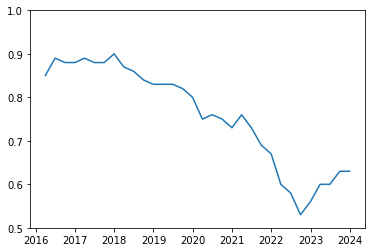

In [77]:
city_df = Borough_df[(Borough_df['Measure'] == measure_name) & (Borough_df['Borough'] == 'Lambeth')]
plt.plot(city_df['Date'], city_df['Proportion'])
plt.ylim(0.5, 1);

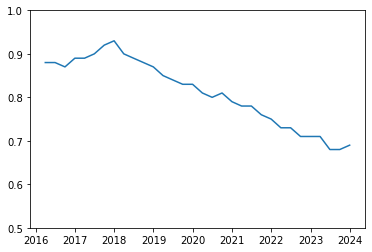

In [78]:
city_df = Borough_df[(Borough_df['Measure'] == measure_name) & (Borough_df['Borough'] == 'Wandsworth')]
plt.plot(city_df['Date'], city_df['Proportion'])
plt.ylim(0.5, 1);

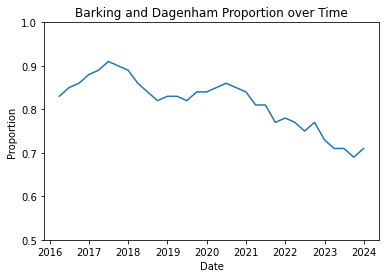

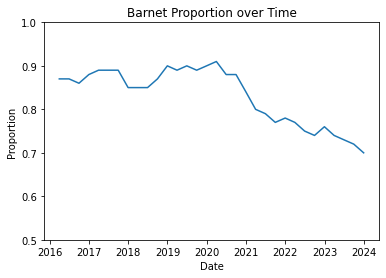

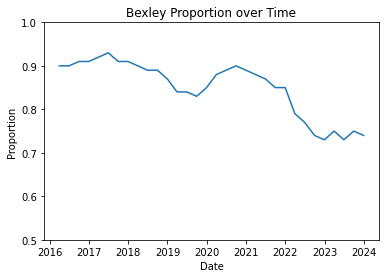

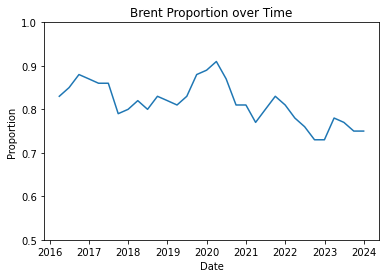

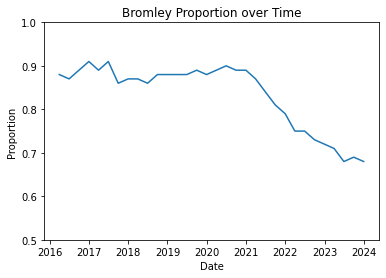

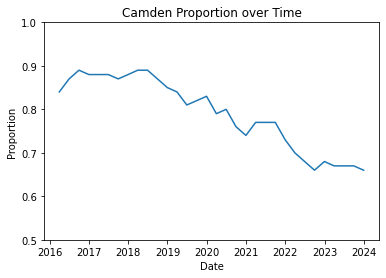

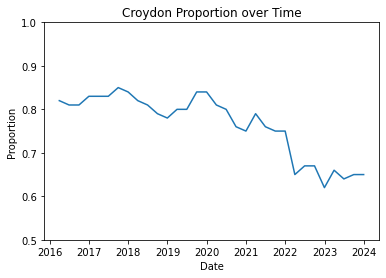

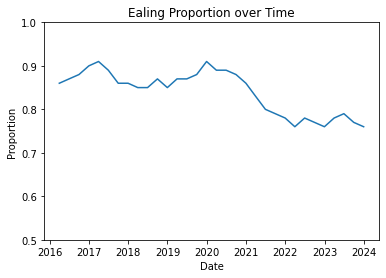

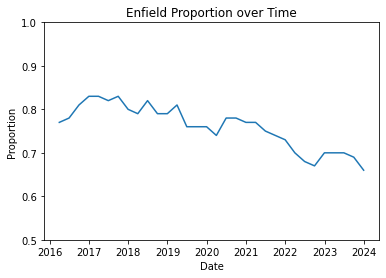

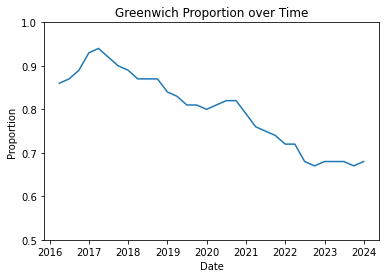

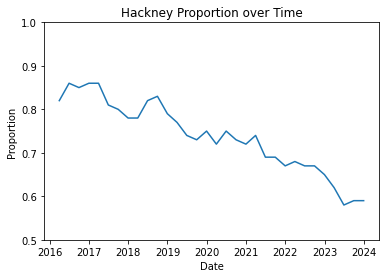

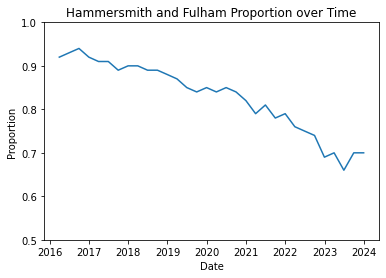

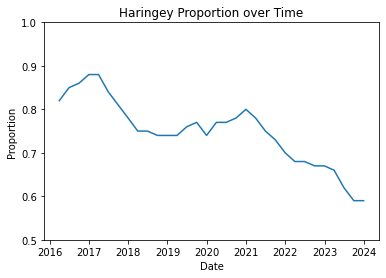

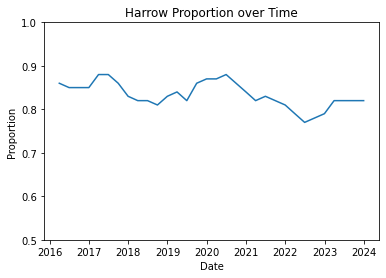

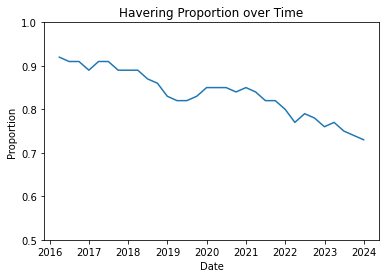

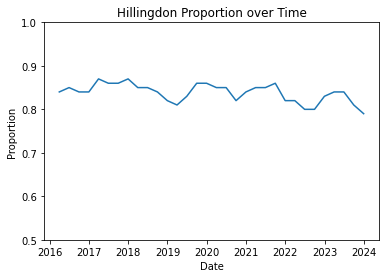

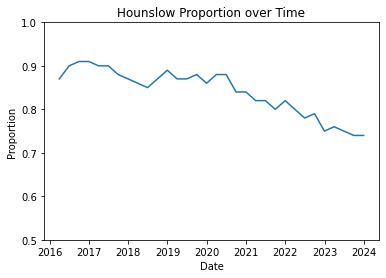

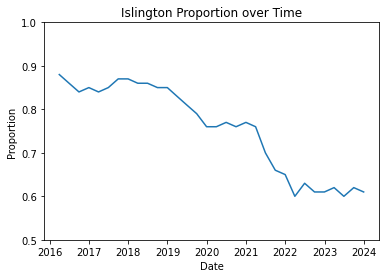

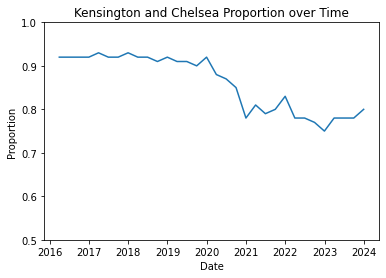

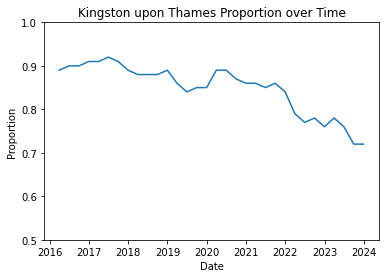

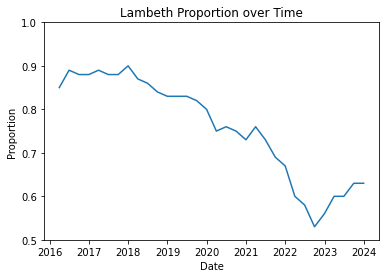

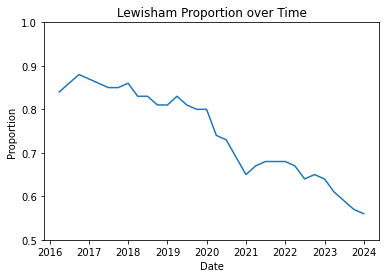

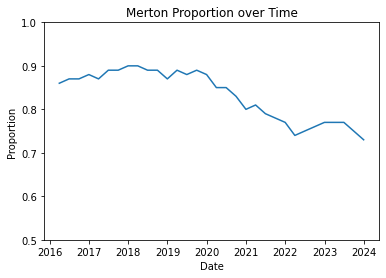

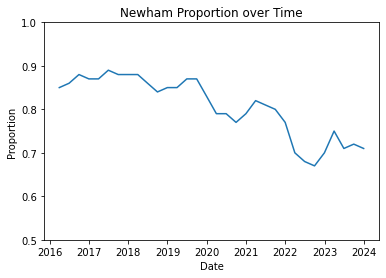

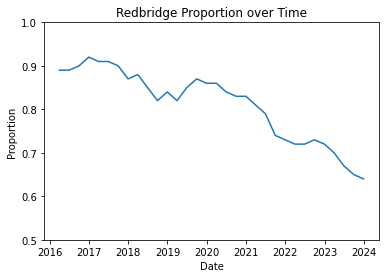

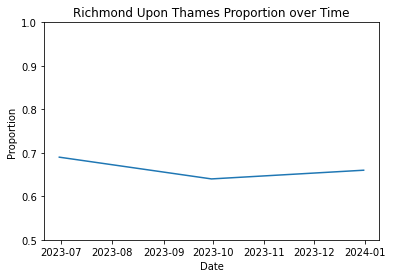

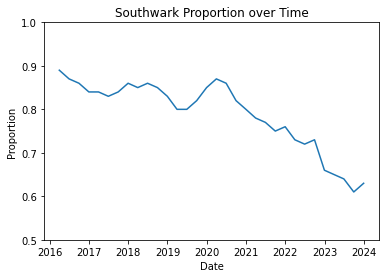

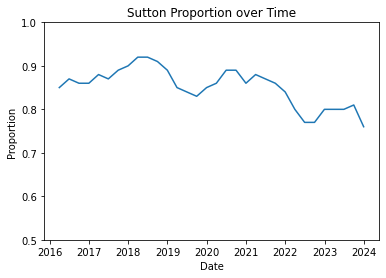

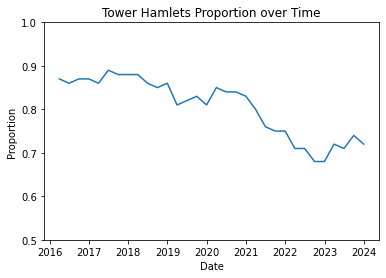

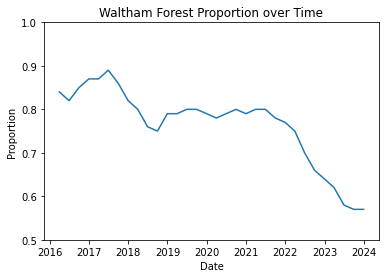

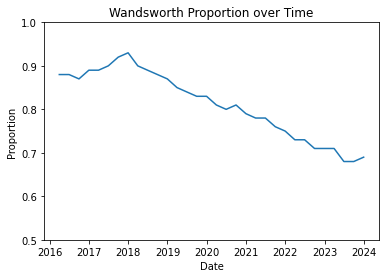

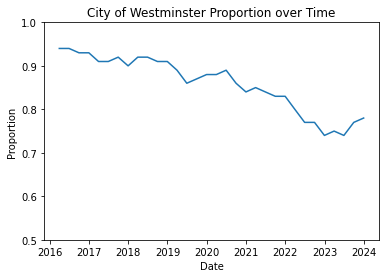

In [81]:
for i in all_borough:
    city_df = Borough_df[(Borough_df['Measure'] == measure_name) & (Borough_df['Borough'] == i)]
    plt.figure()
    plt.plot(city_df['Date'], city_df['Proportion'])
    plt.ylim(0.5, 1)
    plt.title(f'{i} Proportion over Time')
    plt.xlabel('Date')
    plt.ylabel('Proportion')
    plt.show() 

In [72]:
Crime_df = pd.read_csv(r"C:\Users\assis\Downloads\combined_crime.csv")

C:\Users\assis\AppData\Local\Temp\ipykernel_17360\345411469.py:1: DtypeWarning: Columns (0,4,5,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  Crime_df = pd.read_csv(r"C:\Users\assis\Downloads\combined_crime.csv")


In [74]:
Crime_df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')